In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

In [160]:
#Verisetini inceleme
c = pd.read_csv("tablet.csv")
df= c.copy()

In [161]:
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,Yok,1.9,Yok,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,Yok,0.5,Var,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz


In [162]:
df.drop(["MikroislemciHizi","CiftHat","Kalinlik","Agirlik",
         "CozunurlukYükseklik","CozunurlukGenislik","BataryaOmru","3G",
         "Dokunmatik","WiFi","Renk"], axis=1,inplace=True)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BataryaGucu     2000 non-null   int64  
 1   Bluetooth       2000 non-null   object 
 2   OnKameraMP      1995 non-null   float64
 3   4G              2000 non-null   object 
 4   DahiliBellek    2000 non-null   int64  
 5   CekirdekSayisi  2000 non-null   int64  
 6   ArkaKameraMP    2000 non-null   int64  
 7   RAM             1988 non-null   float64
 8   FiyatAraligi    2000 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 140.8+ KB


In [164]:
print('Kolonların tipleri:\n',df.dtypes)
print('-'*80)
print('Kolonlar:',df.columns)
print('-'*80)
print('Satır sayısı:',df.shape[0])
print('Kolon sayısı:',df.shape[1])

Kolonların tipleri:
 BataryaGucu         int64
Bluetooth          object
OnKameraMP        float64
4G                 object
DahiliBellek        int64
CekirdekSayisi      int64
ArkaKameraMP        int64
RAM               float64
FiyatAraligi       object
dtype: object
--------------------------------------------------------------------------------
Kolonlar: Index(['BataryaGucu', 'Bluetooth', 'OnKameraMP', '4G', 'DahiliBellek',
       'CekirdekSayisi', 'ArkaKameraMP', 'RAM', 'FiyatAraligi'],
      dtype='object')
--------------------------------------------------------------------------------
Satır sayısı: 2000
Kolon sayısı: 9


In [165]:
df.head()

,BataryaGucu,Bluetooth,OnKameraMP,4G,DahiliBellek,CekirdekSayisi,ArkaKameraMP,RAM,FiyatAraligi
0,1325,Yok,2.0,Yok,50,1,10,2328.0,Normal
1,1046,Var,0.0,Var,58,8,0,3863.0,Pahalı
2,843,Yok,1.0,Yok,16,7,4,1734.0,Ucuz
3,894,Yok,1.0,Var,50,3,14,3615.0,Pahalı
4,936,Yok,1.0,Yok,18,3,18,2391.0,Normal


In [166]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BataryaGucu,2000.0,1238.518500,439.418206,501.0,851.75,1226.0,1615.25,1998.0
OnKameraMP,1995.0,4.312281,4.342095,0.0,1.00,3.0,7.00,19.0
DahiliBellek,2000.0,32.046500,18.145715,2.0,16.00,32.0,48.00,64.0
CekirdekSayisi,2000.0,4.520500,2.287837,1.0,3.00,4.0,7.00,8.0
ArkaKameraMP,2000.0,9.916500,6.064315,0.0,5.00,10.0,15.00,20.0
RAM,1988.0,2116.243964,1082.513059,256.0,1204.75,2129.5,3049.50,3998.0


In [167]:
df.corr(numeric_only=True)

,BataryaGucu,OnKameraMP,DahiliBellek,CekirdekSayisi,ArkaKameraMP,RAM
BataryaGucu,1.000000,0.032167,-0.004004,-0.029727,0.031441,-0.000883
OnKameraMP,0.032167,1.000000,-0.028642,-0.013721,0.645697,0.012528
DahiliBellek,-0.004004,-0.028642,1.000000,-0.028310,-0.033273,0.032883
CekirdekSayisi,-0.029727,-0.013721,-0.028310,1.000000,-0.001193,0.005576
ArkaKameraMP,0.031441,0.645697,-0.033273,-0.001193,1.000000,0.029540
RAM,-0.000883,0.012528,0.032883,0.005576,0.029540,1.000000


In [168]:
df.isnull().sum()

BataryaGucu        0
Bluetooth          0
OnKameraMP         5
4G                 0
DahiliBellek       0
CekirdekSayisi     0
ArkaKameraMP       0
RAM               12
FiyatAraligi       0
dtype: int64

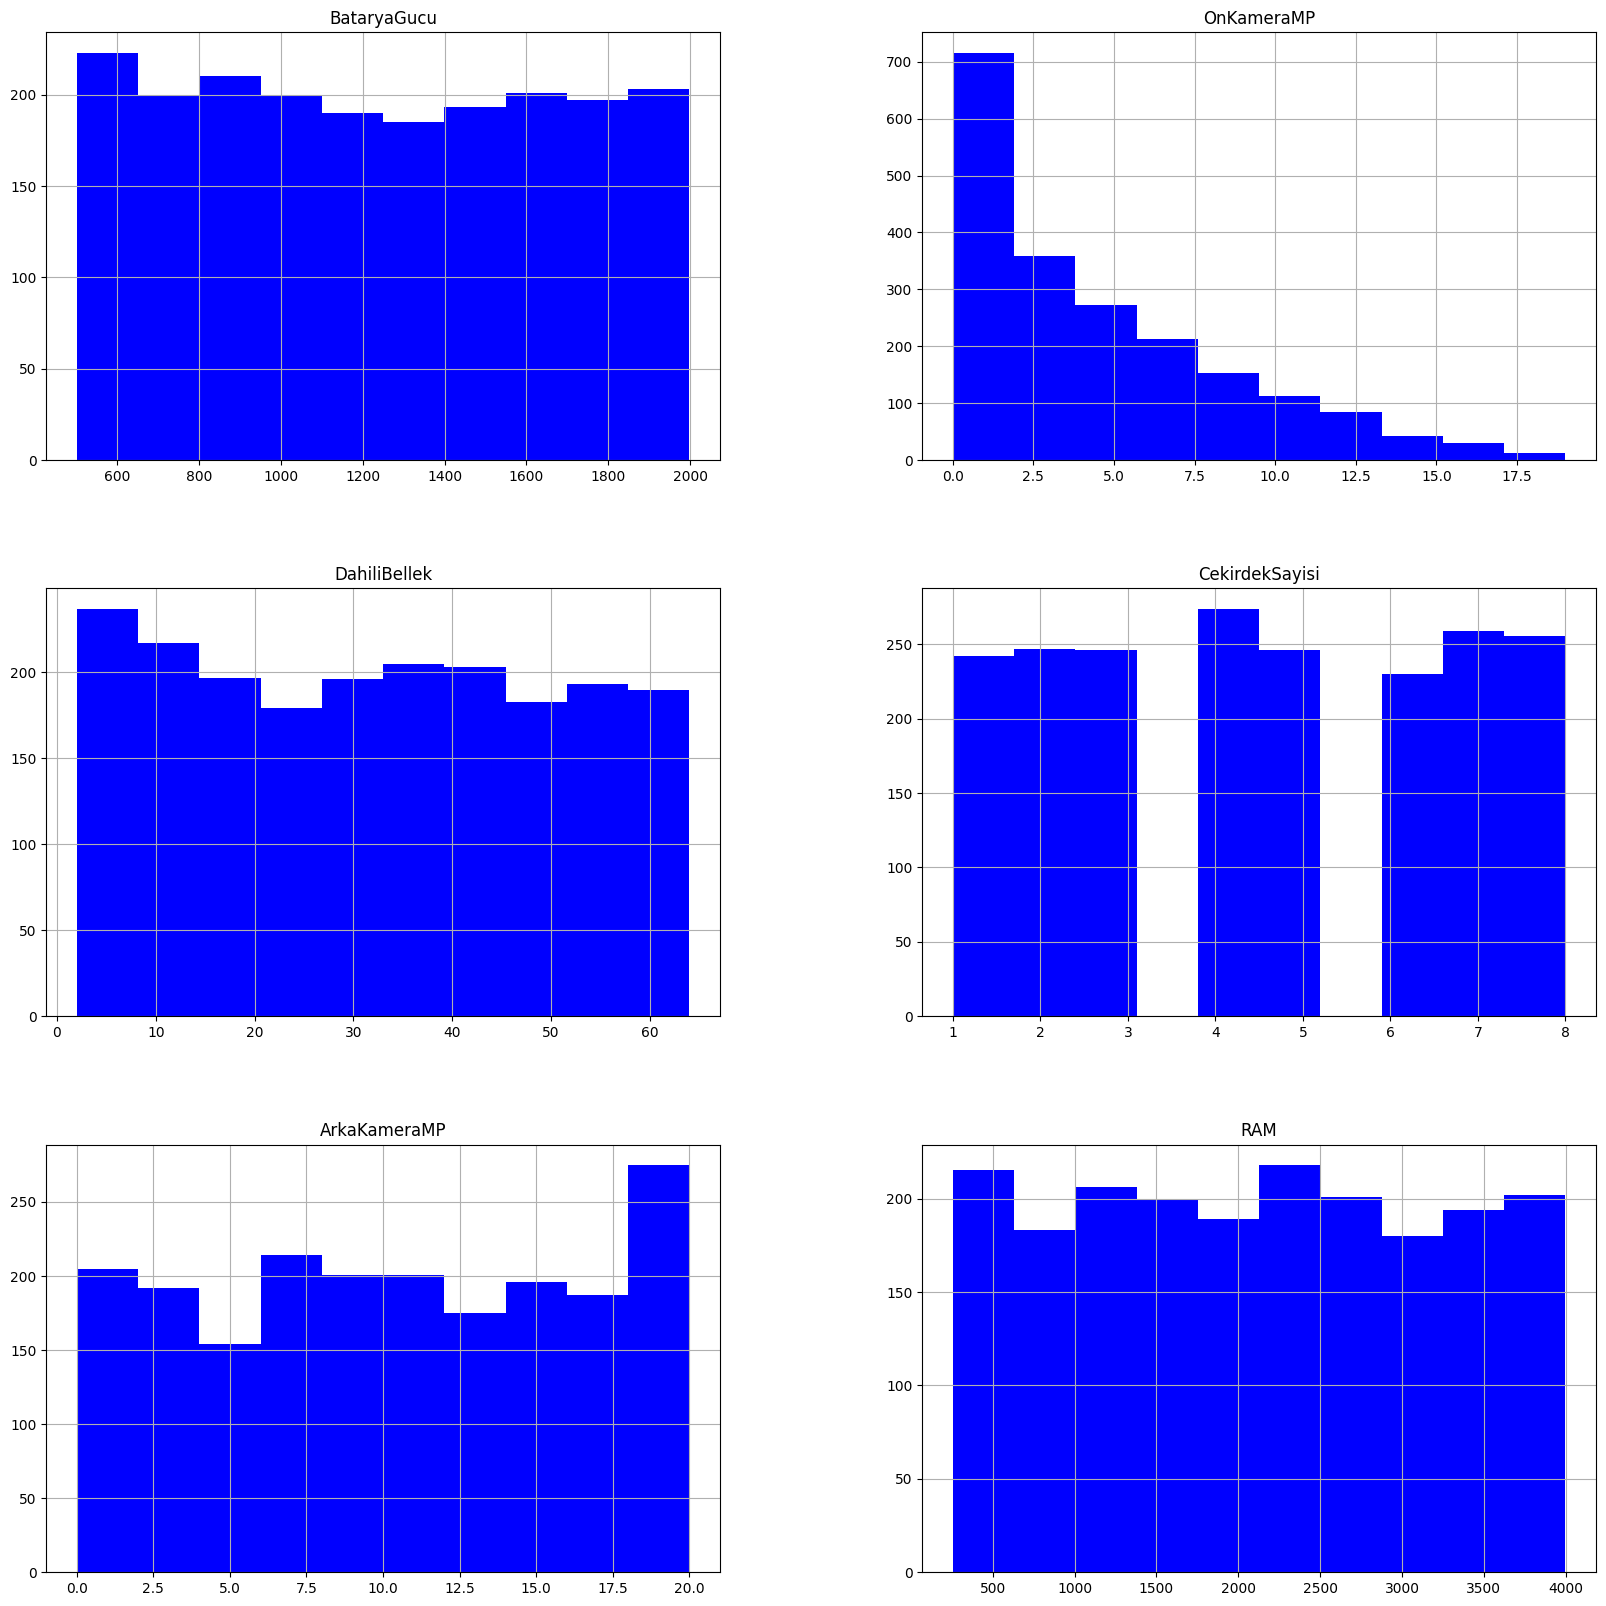

In [169]:
df.hist(figsize =(20,20), color = "blue")
plt.show()

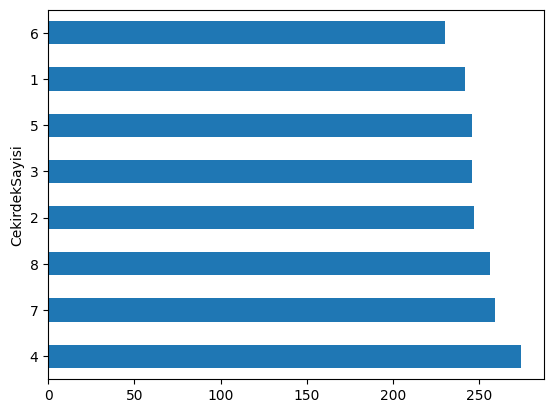

In [170]:
df.CekirdekSayisi.value_counts().plot.barh();

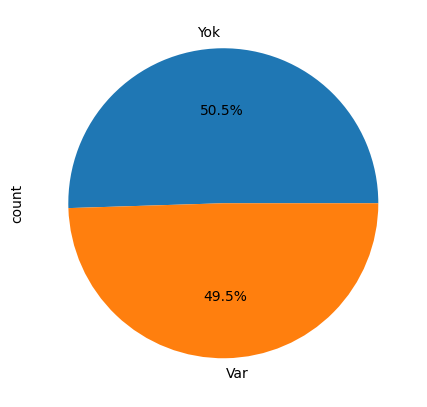

In [171]:
fig = plt.figure(figsize=(5,15))
df.Bluetooth.value_counts().plot(kind = 'pie',autopct='%.1f%%');

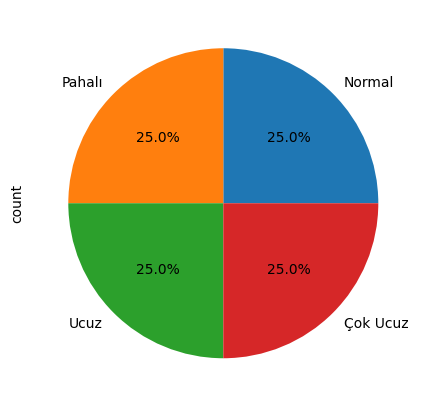

In [172]:
fig = plt.figure(figsize=(5,15))
df.FiyatAraligi.value_counts().plot(kind = 'pie',autopct='%.1f%%');

In [173]:
#Verisetini modele hazır hale getirme

In [174]:
df["OnKameraMP"].mean()

4.312280701754386

In [175]:
df["RAM"].mean()

2116.243963782696

In [176]:
knn_imputer = KNNImputer()
df["OnKameraMP"] = knn_imputer.fit_transform(df[["OnKameraMP"]])
df["RAM"] = knn_imputer.fit_transform(df[["RAM"]])

In [177]:
df.isnull().sum()

BataryaGucu       0
Bluetooth         0
OnKameraMP        0
4G                0
DahiliBellek      0
CekirdekSayisi    0
ArkaKameraMP      0
RAM               0
FiyatAraligi      0
dtype: int64

In [178]:
df["FiyatAraligi"] = df["FiyatAraligi"].replace("Çok Ucuz",0)
df["FiyatAraligi"] = df["FiyatAraligi"].replace("Ucuz",1)
df["FiyatAraligi"] = df["FiyatAraligi"].replace("Normal",2)
df["FiyatAraligi"] = df["FiyatAraligi"].replace("Pahalı",3)

In [179]:
df.replace("Var",1,inplace=True)
df.replace("Yok",0,inplace=True)

In [180]:
df.head(10)

,BataryaGucu,Bluetooth,OnKameraMP,4G,DahiliBellek,CekirdekSayisi,ArkaKameraMP,RAM,FiyatAraligi
0,1325,0,2.0,0,50,1,10,2328.0,2
1,1046,1,0.0,1,58,8,0,3863.0,3
2,843,0,1.0,0,16,7,4,1734.0,1
3,894,0,1.0,1,50,3,14,3615.0,3
4,936,0,1.0,0,18,3,18,2391.0,2
5,1162,0,0.0,0,50,4,10,1404.0,1
6,1849,1,1.0,0,29,7,12,3330.0,3
7,1860,0,2.0,1,55,6,3,676.0,0
8,1536,0,12.0,0,13,7,20,2020.0,2
9,539,1,9.0,0,21,7,14,3597.0,2


In [181]:
X = df.drop("FiyatAraligi", axis = 1)
y = df["FiyatAraligi"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 50)

In [182]:
X

,BataryaGucu,Bluetooth,OnKameraMP,4G,DahiliBellek,CekirdekSayisi,ArkaKameraMP,RAM
0,1325,0,2.0,0,50,1,10,2328.0
1,1046,1,0.0,1,58,8,0,3863.0
2,843,0,1.0,0,16,7,4,1734.0
3,894,0,1.0,1,50,3,14,3615.0
4,936,0,1.0,0,18,3,18,2391.0
...,...,...,...,...,...,...,...,...
1995,689,0,3.0,1,7,2,6,1241.0
1996,1654,0,1.0,0,11,7,2,1070.0
1997,742,0,4.0,0,56,7,14,3557.0
1998,704,0,4.0,0,53,6,6,3653.0


In [183]:
y

0       2
1       3
2       1
3       3
4       2
       ..
1995    0
1996    1
1997    3
1998    2
1999    2
Name: FiyatAraligi, Length: 2000, dtype: int64

In [184]:
#MODEL KURMA

In [185]:
#Stats model

In [186]:
stats = sm.OLS(y_train, sm.add_constant(X_train))

In [187]:
statsmodel= stats.fit()

In [188]:
statsmodel.params

const            -1.168350
BataryaGucu       0.000503
Bluetooth        -0.020004
OnKameraMP        0.000617
4G                0.018891
DahiliBellek      0.000892
CekirdekSayisi    0.002937
ArkaKameraMP     -0.000121
RAM               0.000947
dtype: float64

In [189]:
statsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           FiyatAraligi   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     1369.
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:26:35   Log-Likelihood:                -803.44
No. Observations:                1600   AIC:                             1625.
Df Residuals:                    1591   BIC:                             1673.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.1683      0.049    -23.702      0.000      -1.265      -1.072
BataryaGucu        0.0005   2.27e-05     22.172      0.000       0.000       0.001
Bluetooth         -0.0200      0.020     -0.996      0.319      -0.059       0.019
OnKameraMP         0.0006      0.003      0.205      0.838      -0.005       0.007
4G                 0.0189      0.020      0.940      0.347      -0.021       0.058
DahiliBellek       0.0009      0.001      1.605      0.109      -0.000       0.002
CekirdekSayisi     0.0029      0.004      0.670      0.503      -0.006       0.012
ArkaKameraMP      -0.0001      0.002     -0.056      0.955      -0.004       0.004
RAM                0.0009    9.3e-06    101.786      0.000       0.001       0.001
==============================================================================
Omnibus:                       67.430   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.204
Skew:                           0.469   Prob(JB):                     6.32e-18
Kurtosis:                       3.555   Cond. No.                     1.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [190]:
X_test_const = sm.add_constant(X_test)
y_pred_stats = statsmodel.predict(X_test_const)

In [191]:
mean_squared_error(y_test,y_pred_stats)

0.15910607598553742

In [192]:
tablet_stats = np.array([1, 1350, 0, 2.0, 1, 50, 2, 9, 2300.0])
tablet_stats = yeniveri.reshape(1, -1)  # 1 satır, -1 ile otomatik sütun sayısı
tablet_stats = sm.add_constant(yeniveri)
y_pred = statsmodel.predict(yeniveri)
print(y_pred)

[1.75759046]


In [193]:
#LR MODEL

In [194]:
reg = LinearRegression()
lr = reg.fit(X_train,y_train)

In [195]:
y_pred_lr = lr.predict(X_test)

In [196]:
mean_squared_error(y_test,y_pred_lr)

0.1591060759855376

In [197]:
#Modeller için yeni tablet verisi

In [198]:
yeni_tablet = np.array([[1350], [0], [2.0], [1], [50], [2], [9], [2300.0]])
yeni_tablet = input_data.T

In [199]:
lr.predict(yeni_tablet)

C:\Users\deniz\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.75759046])

In [200]:
#Karar Ağacı

In [201]:
dct = DecisionTreeClassifier()

In [202]:
dtree = dct.fit(X_train,y_train)

In [203]:
y_pred_dtree = dtree.predict(X_test)

In [204]:
mean_squared_error(y_test,y_pred_dtree)

0.245

In [205]:
dtree.predict(yeni_tablet)

C:\Users\deniz\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

In [206]:
#KNN ALGORİTMASI

In [207]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [208]:
knn_model

KNeighborsRegressor()

In [209]:
knn_model.n_neighbors

5

In [210]:
y_pred_knn = knn_model.predict(X_test)

In [211]:
mean_squared_error(y_test, y_pred_knn)

0.17980000000000002

In [212]:
knn_model.predict(yeni_tablet)

C:\Users\deniz\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([1.4])

In [213]:
#GBM MODEL

In [214]:
gbm_model =GradientBoostingRegressor().fit(X_train , y_train)

In [215]:
y_pred_gbm = gbm_model.predict(X_test)

In [216]:
mean_squared_error(y_test, y_pred_gbm)

0.13445986326688142

In [217]:
gbm_model.predict(yeni_tablet)

C:\Users\deniz\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([1.56342442])